# **5장. 시계열 데이터와 자연어 처리**  

## **5-3절.  문장 생성 모델과 LLM**   


📌[실습 05-25] KoNLPy 라이브러리 설치 및 Okt 토크나이저 불러오기

In [ ]:
!apt-get install -y openjdk-11-jdk   # KoNLPy가 필요로 하는 Java 프로그램 설치
!pip install konlpy                  # 패키지 설치
from konlpy.tag import Okt           # 패키지 불러오기

📌[실습 05-26] 토크나이저 정의하기  

In [ ]:
okt=Okt()
tokenizer=okt.morphs

text="죽는 날까지 하늘을 우러러 한 점 부끄러움이 없기를."
tokenizer(text)

['죽는', '날', '까지', '하늘', '을', '우러러', '한', '점', '부끄러움', '이', '없기를', '.']

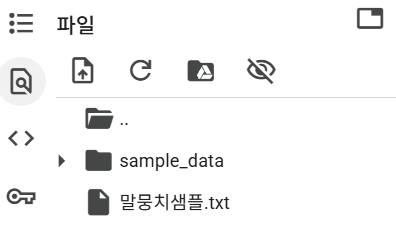

📌[실습 05-27] 말뭉치 파일 불러오기  

In [ ]:
import re
file="말뭉치샘플.txt"  # 말뭉치 파일 지정

# txt 파일 불러오기
with open(file, "r", encoding="utf-8") as f:
    말뭉치= f.read()

# 문장 단위로 나누기 (공백과 구두점 기준)
sentences = re.split(r'(?<=[.!?])\s+', 말뭉치)
print(f"총 {len(sentences)}개의 문장으로 구성")

print("처음 5 문장"); print()
for idx in range(5):
  print(sentences[idx]); print()


총 509개의 문장으로 구성
처음 5 문장

그해 가을에는 단풍이 물들고 새들이 노래를 불렀다.

그해 봄에는 벚꽃이 피고 아이가 산책을 했다.

겨울에는 강물이 시리고 강아지가 노래를 부른다.

여름엔 햇살이 흐르고 아이가 즐겁다.

그해 여름에는 태양이 이글거리고 강아지가 신났다.



📌[실습 05-28] 형태소 단위로 토큰화하기  

In [ ]:
토큰화_문장=[tokenizer(idx) for idx in sentences]

print("처음 5 문장 토큰화 결과:"); print()
for idx in range(5):
  print(토큰화_문장[idx])


처음 5 문장 토큰화 결과:

['그해', '가을', '에는', '단풍', '이', '물들고', '새', '들', '이', '노래', '를', '불렀다', '.']
['그해', '봄', '에는', '벚꽃', '이', '피고', '아이', '가', '산책', '을', '했다', '.']
['겨울', '에는', '강물', '이', '시리', '고', '강아지', '가', '노래', '를', '부른다', '.']
['여름', '엔', '햇살', '이', '흐르고', '아이', '가', '즐겁다', '.']
['그해', '여름', '에는', '태양', '이', '이글거리고', '강아지', '가', '신났다', '.']


📌[실습 05-29] 인코딩 딕셔너리 만들기  

In [ ]:
token_to_index={}
index=1  # 0은 패딩 용도로 남겨둠
for sentence in 토큰화_문장:
    for token in sentence:
        if token not in token_to_index:
            token_to_index[token] = index
            index = index+1
print(token_to_index)
print("등록된 토큰의 수=", len(token_to_index))
print("'꽃'의 토큰 인덱스는: ", token_to_index["꽃"])

{'그해': 1, '가을': 2, '에는': 3, '단풍': 4, '이': 5, '물들고': 6, '새': 7, '들': 8, '노래': 9, '를': 10, '불렀다': 11, '.': 12, '봄': 13, '벚꽃': 14, '피고': 15, '아이': 16, '가': 17, '산책': 18, '을': 19, '했다': 20, '겨울': 21, '강물': 22, '시리': 23, '고': 24, '강아지': 25, '부른다': 26, '여름': 27, '엔': 28, '햇살': 29, '흐르고': 30, '즐겁다': 31, '태양': 32, '이글거리고': 33, '신났다': 34, '흩날리고': 35, '잠': 36, '잤다': 37, '맑고': 38, '깊고': 39, '뛰었다': 40, '사람': 41, '없다': 42, '낮잠': 43, '푸르고': 44, '소풍': 45, '간다': 46, '눈': 47, '내리고': 48, '신난다': 49, '밤': 50, '에': 51, '시린': 52, '내': 53, '린다': 54, '얼고': 55, '도': 56, '춥다': 57, '꽃': 58, '은': 59, '엄청': 60, '추웠다': 61, '따뜻하다': 62, '따뜻했다': 63, '참': 64, '쏟아지고': 65, '웃는다': 66, '붉고': 67, '깊다': 68, '피었다': 69, '따뜻하고': 70, '떨어지고': 71, '잔다': 72, '하늘': 73, '식고': 74, '뛰어놀았다': 75, '바람': 76, '즐겁게': 77, '뛰어': 78, '논다': 79, '차갑고': 80, '차갑다': 81, '불': 82, '날리고': 83, '놀고': 84, '있다': 85, '한다': 86, '선선': 87, '하고': 88, '핀다': 89, '물들었다': 90, '말고': 91, '이글거렸다': 92, '놀았다': 93, '신나게': 94, '하면': 95, '뛰어놀고': 96, '갔다': 97, '하얀': 98, '날았

📌[실습 05-30] 문장을 인코딩하기  

In [ ]:
인코딩_문장=[[token_to_index[token] for token in sentence] for sentence in 토큰화_문장]
print("전체 문장:", 인코딩_문장)
print("처음 5 문장:"); print()
for idx in range(5):
  print(인코딩_문장[idx])

전체 문장: [[1, 2, 3, 4, 5, 6, 7, 8, 5, 9, 10, 11, 12], [1, 13, 3, 14, 5, 15, 16, 17, 18, 19, 20, 12], [21, 3, 22, 5, 23, 24, 25, 17, 9, 10, 26, 12], [27, 28, 29, 5, 30, 16, 17, 31, 12], [1, 27, 3, 32, 5, 33, 25, 17, 34, 12], [1, 2, 3, 4, 5, 35, 16, 17, 36, 19, 37, 12], [1, 13, 3, 4, 5, 38, 25, 17, 36, 19, 37, 12], [2, 3, 22, 5, 39, 16, 17, 31, 12], [13, 28, 22, 5, 6, 25, 17, 40, 12], [27, 28, 29, 5, 33, 41, 8, 5, 42, 12], [1, 27, 3, 32, 5, 33, 25, 17, 43, 19, 37, 12], [13, 3, 22, 5, 44, 41, 8, 5, 45, 19, 46, 12], [1, 21, 3, 14, 5, 6, 25, 17, 9, 10, 11, 12], [21, 3, 47, 5, 48, 25, 17, 49, 12], [2, 28, 29, 5, 6, 7, 8, 5, 31, 12], [21, 50, 51, 52, 47, 5, 53, 54, 12], [21, 3, 22, 5, 55, 25, 56, 57, 12], [13, 28, 58, 5, 35, 16, 8, 5, 31, 12], [1, 21, 59, 60, 61, 12], [21, 59, 60, 57, 12], [13, 59, 62, 12], [1, 13, 59, 60, 63, 12], [1, 21, 59, 64, 61, 12], [13, 3, 58, 5, 65, 16, 8, 5, 66, 12], [2, 3, 4, 5, 67, 22, 5, 68, 12], [1, 21, 3, 58, 5, 69, 12], [13, 28, 32, 5, 70, 16, 8, 5, 49, 12], [2,

📌[실습 05-31] 디코딩 딕셔너리 만들기

In [ ]:
index_to_token={idx: word for word, idx in token_to_index.items()}
print(index_to_token)
print("인덱스 58의 토큰은?", index_to_token[58])

{1: '그해', 2: '가을', 3: '에는', 4: '단풍', 5: '이', 6: '물들고', 7: '새', 8: '들', 9: '노래', 10: '를', 11: '불렀다', 12: '.', 13: '봄', 14: '벚꽃', 15: '피고', 16: '아이', 17: '가', 18: '산책', 19: '을', 20: '했다', 21: '겨울', 22: '강물', 23: '시리', 24: '고', 25: '강아지', 26: '부른다', 27: '여름', 28: '엔', 29: '햇살', 30: '흐르고', 31: '즐겁다', 32: '태양', 33: '이글거리고', 34: '신났다', 35: '흩날리고', 36: '잠', 37: '잤다', 38: '맑고', 39: '깊고', 40: '뛰었다', 41: '사람', 42: '없다', 43: '낮잠', 44: '푸르고', 45: '소풍', 46: '간다', 47: '눈', 48: '내리고', 49: '신난다', 50: '밤', 51: '에', 52: '시린', 53: '내', 54: '린다', 55: '얼고', 56: '도', 57: '춥다', 58: '꽃', 59: '은', 60: '엄청', 61: '추웠다', 62: '따뜻하다', 63: '따뜻했다', 64: '참', 65: '쏟아지고', 66: '웃는다', 67: '붉고', 68: '깊다', 69: '피었다', 70: '따뜻하고', 71: '떨어지고', 72: '잔다', 73: '하늘', 74: '식고', 75: '뛰어놀았다', 76: '바람', 77: '즐겁게', 78: '뛰어', 79: '논다', 80: '차갑고', 81: '차갑다', 82: '불', 83: '날리고', 84: '놀고', 85: '있다', 86: '한다', 87: '선선', 88: '하고', 89: '핀다', 90: '물들었다', 91: '말고', 92: '이글거렸다', 93: '놀았다', 94: '신나게', 95: '하면', 96: '뛰어놀고', 97: '갔다', 98: '하얀', 99:

In [ ]:
token_to_index.items()

dict_items([('그해', 1), ('가을', 2), ('에는', 3), ('단풍', 4), ('이', 5), ('물들고', 6), ('새', 7), ('들', 8), ('노래', 9), ('를', 10), ('불렀다', 11), ('.', 12), ('봄', 13), ('벚꽃', 14), ('피고', 15), ('아이', 16), ('가', 17), ('산책', 18), ('을', 19), ('했다', 20), ('겨울', 21), ('강물', 22), ('시리', 23), ('고', 24), ('강아지', 25), ('부른다', 26), ('여름', 27), ('엔', 28), ('햇살', 29), ('흐르고', 30), ('즐겁다', 31), ('태양', 32), ('이글거리고', 33), ('신났다', 34), ('흩날리고', 35), ('잠', 36), ('잤다', 37), ('맑고', 38), ('깊고', 39), ('뛰었다', 40), ('사람', 41), ('없다', 42), ('낮잠', 43), ('푸르고', 44), ('소풍', 45), ('간다', 46), ('눈', 47), ('내리고', 48), ('신난다', 49), ('밤', 50), ('에', 51), ('시린', 52), ('내', 53), ('린다', 54), ('얼고', 55), ('도', 56), ('춥다', 57), ('꽃', 58), ('은', 59), ('엄청', 60), ('추웠다', 61), ('따뜻하다', 62), ('따뜻했다', 63), ('참', 64), ('쏟아지고', 65), ('웃는다', 66), ('붉고', 67), ('깊다', 68), ('피었다', 69), ('따뜻하고', 70), ('떨어지고', 71), ('잔다', 72), ('하늘', 73), ('식고', 74), ('뛰어놀았다', 75), ('바람', 76), ('즐겁게', 77), ('뛰어', 78), ('논다', 79), ('차갑고', 80), ('차갑다', 81), ('불', 82)

📌[실습 05-32] 데이터 확인하기  

In [ ]:
VOCAB_SIZE=len(token_to_index)+1
print(f"말뭉치에 있는 토큰의 수는 {VOCAB_SIZE}개입니다")

말뭉치에 있는 토큰의 수는 115개입니다


### 모델 학습 및 예측하기

📌[실습 05-33] 라이브러리 불러오기  

In [ ]:
!pip install koreanize_matplotlib  # 한글폰트 설치
import koreanize_matplotlib

import numpy as np; import pandas as pd
import os
import matplotlib.pyplot as plt; import random
import tensorflow as tf; from tensorflow import keras
import sentencepiece as spm
import re
from sklearn.model_selection import train_test_split
from keras.models import Sequential; from keras.layers import Embedding, Dense, GRU
from sklearn.metrics import mean_squared_error, r2_score; import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical  # 원핫 변환 함수
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from konlpy.tag import Okt
from collections import defaultdict
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings; warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.9 MB/s eta 0:00:00


📌[실습 05-34] 피처와 타깃 생성하기  

In [ ]:
lag=5  # 예: 앞의 5개 토큰을 보고 다음 토큰 예측

X, y = [], []
for idx in 인코딩_문장:
    for i in range(lag, len(idx)):
        X.append(idx[i-lag:i])  # 입력 시퀀스 (lag 길이)
        y.append(idx[i])        # 정답: 다음 토큰

print(f"슬라이딩 윈도우 방식 ==> 총 {len(X)}개 학습 샘플"); print()
X=np.array(X)  # 어레이로 변화
y=np.array(y)

print(f"피처: shape={X.shape}"); print(X); print()
print(f"타깃: shape={y.shape}"); print(y)


슬라이딩 윈도우 방식 ==> 총 3049개 학습 샘플

피처: shape=(3049, 5)
[[  1   2   3   4   5]
 [  2   3   4   5   6]
 [  3   4   5   6   7]
 ...
 [ 58   5 114  16   8]
 [  5 114  16   8   5]
 [114  16   8   5  93]]

타깃: shape=(3049,)
[ 6  7  8 ...  5 93 12]


📌[실습 05-35] 데이터 분할과 원핫 인코딩하기


In [ ]:
#  랜덤 시드 고정 (결과 일관성 보장)
SEED=42; np.random.seed(SEED); random.seed(SEED); tf.random.set_seed(SEED)

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 타겟(y)을 원핫으로 변환
y_train=to_categorical(y_train, num_classes=VOCAB_SIZE)
y_test=to_categorical(y_test, num_classes=VOCAB_SIZE)

# 데이터의 차원 확인
print(f"x_train: shape={x_train.shape}")
print(f"x_test: shape={x_test.shape}")
print(f"y_train: shape={y_train.shape}")
print(f"y_train: shape={y_test.shape}")

x_train: shape=(2439, 5)
x_test: shape=(610, 5)
y_train: shape=(2439, 115)
y_train: shape=(610, 115)


📌[실습 05-36] 모델 설정하기

In [ ]:
embedding_dim=15                            # 임베딩 벡터의 차원 지정
model=Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE, output_dim=embedding_dim))
model.add(GRU(32))
#model.add(Dense(8, activation='relu'))             # 필요시 은닉층 추가
model.add(Dense(VOCAB_SIZE, activation='softmax'))  # 출력층

📌[실습 05-37] 모델을 컴파일하고 학습하기

In [ ]:
# 라이브러리 추가
from tensorflow.keras.metrics import TopKCategoricalAccuracy
# 조기 종료
early_stop=EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)
# 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam",
    metrics=['accuracy', TopKCategoricalAccuracy(k=5, name='top_5_acc')] )
# 모델 학습
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=[early_stop])


📌[실습 05-38] 학습 과정의 손실과 정확도 변화 시각화하기  

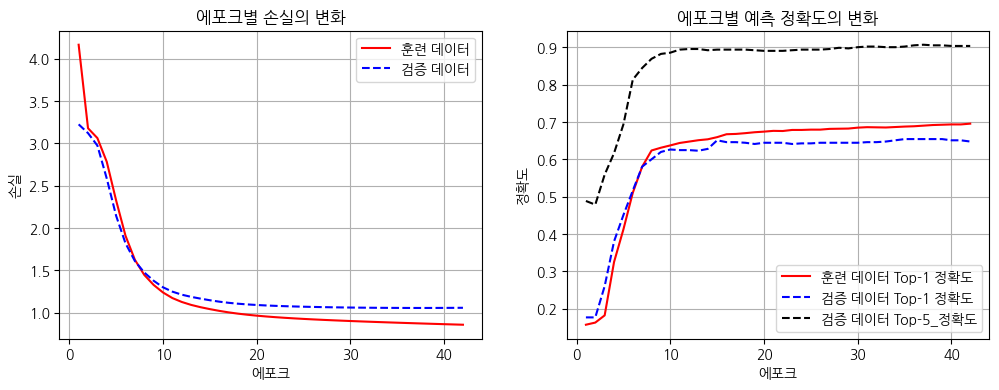

In [ ]:
import matplotlib.pyplot as plt

# 기본 Keras 로그 시각화 (loss, accuracy)
epochs=range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 4))

# 1) 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'r-', label='훈련 데이터')
plt.plot(epochs, history.history['val_loss'], 'b--', label='검증 데이터')

plt.title('에포크별 손실의 변화')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend()
plt.grid(True)

# 2) 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], 'r-', label='훈련 데이터 Top-1 정확도')
plt.plot(epochs, history.history['val_accuracy'],'b--', label='검증 데이터 Top-1 정확도')
plt.plot(epochs, history.history['val_top_5_acc'],'k--', label='검증 데이터 Top-5_정확도')

plt.title('에포크별 예측 정확도의 변화')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.grid(True)

plt.show()


### **새로운 문장 생성하기**  

📌[실습 05-39] 1단계: 시드 설정하기  

In [ ]:
# 1단계: 시드 설정
seed="그해 가을엔 단풍이"
seed

'그해 가을엔 단풍이'

📌[실습 05-40] 2~4단계: 토큰 변환 → 정수 인코딩 → 패딩  

In [ ]:
# 2단계:시드 → 토큰 변환
tokens=tokenizer(seed)
print("Step-2(토큰 변환):", tokens); print()

# 3단계: 토큰 → 정수로 인코딩
encoded=[token_to_index[idx] for idx in tokens]
print("Step-3(인코딩 결과):",encoded); print()

# 4단계: 패딩 (시퀀스 길이가 lag보다 짧을 경우, 앞을 0으로 채움)
encoded=pad_sequences([encoded], maxlen=lag, padding='pre')
print("Step-4(패딩 결과):", encoded); print()

Step-2(토큰 변환): ['그해', '가을', '엔', '단풍', '이']

Step-3(인코딩 결과): [1, 2, 28, 4, 5]

Step-4(패딩 결과): [[ 1  2 28  4  5]]



📌[실습 05-41] 5단계: 토큰별 확률 예측하기  

In [ ]:
probs=model.predict(encoded)[0]
print("Step-5(확률 예측):")
print(probs[:20]); print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Step-5(확률 예측):
[2.63269292e-04 2.40895344e-04 2.15295964e-04 1.88451027e-04
 1.89676211e-04 1.19856995e-05 1.27650574e-01 2.63036531e-03
 2.92598961e-05 1.39896496e-04 1.35125534e-04 9.90924891e-05
 1.85342724e-04 2.27754004e-04 2.03452219e-04 4.60664071e-02
 1.84474420e-03 2.84789458e-05 4.50691965e-04 5.65700429e-05]



📌[실습 05-42] 6~8단계: 인덱스 선택 → 토큰 변환 → 시드 확장  

In [ ]:
# 6단계: 확률이 가장 큰 인덱스 선택
next_index=np.argmax(probs)
print("Step-6(예측된 인덱스):",next_index); print()

# 7단계: 인덱스 → 토큰 변환
next_token=index_to_token[next_index]
print("Step-7(예측된 토큰):",next_token); print()

# 8단계: 시드에 공백과 다음 토큰을 붙여 새 시드 생성
seed=seed+" "+next_token
print("Step-8(새로운 시드):",seed)

Step-6(예측된 인덱스): 35

Step-7(예측된 토큰): 흩날리고

Step-8(새로운 시드): 그해 가을엔 단풍이 흩날리고


📌[실습 05-43] Top-k 방식으로 새로운 문장을 생성하는 함수 정의하기  

In [ ]:
def generate(seed, max_token):
    top_k=5    # 확률이 상위 5위인 토큰 중에서 확률적으로 추출
    for _ in range(max_token):  #  max_token 만큼 생성 반복
        tokens = tokenizer(seed)
        encoded = [token_to_index[idx] for idx in tokens]
        encoded = pad_sequences([encoded], maxlen=lag, padding='pre')
        probs = model.predict(encoded, verbose=0)[0]
        #probs = model.predict(encoded)[0]
        top_k_indices = np.argsort(-probs)[:top_k]
        top_k_probs = probs[top_k_indices]
        top_k_probs /= top_k_probs.sum()  # 확률합이 1이 되도록 조정
        next_index = np.random.choice(top_k_indices, p=top_k_probs)
        next_token = index_to_token[next_index] # 인덱스를 토큰으로 변환
        # 종료 조건: 마침표(.)가 생성되면 종료
        if next_token == '.':
            break
        seed=seed + ' ' + next_token
    return seed


📌[실습 05-44] 문장 생성 함수 호출하기  

In [ ]:
SEED="그해 가을엔 단풍이"
generate(SEED, 20)

'그해 가을엔 단풍이 흩날리고 사람 들 이 산책 을 한다'

### **트랜스포머와 GPT를 활용한 실습해 보기**  

📌[실습 05-45] GPT 모델과 토크나이저 불러오기  

In [ ]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast

model=GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')
tokenizer=PreTrainedTokenizerFast.from_pretrained('skt/kogpt2-base-v2',
    bos_token='[BOS]', eos_token='[EOS]', unk_token='[UNK]',
    pad_token='[PAD]', mask_token='[MASK]')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


📌[실습 05-46] 문장 생성 함수 정의하기  

In [ ]:
def 문장_생성(prompt, max_length=200):
    input_ids=tokenizer.encode(prompt, return_tensors='pt')
    output=model.generate(
        input_ids,
        max_length=max_length,
        do_sample=True,
        top_k=30,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id  )
    return tokenizer.decode(output[0], skip_special_tokens=True)

프롬프트 = "나는 어느 날 아침 거울 속 내 모습이 달라진 것을 발견했다. "
print(문장_생성(프롬프트))


나는 어느 날 아침 거울 속 내 모습이 달라진 것을 발견했다. 쥬오쿠보 선착장에 도착한 순간, 기분은 이상해 보였을지 모르지만 내 몸이 얼마나 변했는지 알 수 있었다. 가쁜 숨을 몰아쉬며 거울 앞에 섰다.
"선생님, 저는 선생님과 함께 있었습니다. 저는 언제나 선생님과 함께 있을 것입니다. 우리 두 사람은 다른 사람이 아니고 같은 길을 걸어가고 있습니다. 선생님, 그리고 저는 선생님과의 관계가 어떻게 되든 상관없습니다. 선생님과 저는 같은 길을 가고 있습니다. 오늘따라 더 좋은 길을 걷고 있습니다. 오늘은 저와 저의 부모님이 함께 걸어가는 날로 저를 보고 있는 저를 보니까 너무 좋아져서 저도 저를 보고 있는 것 같아요."
"그런데 왜 나를 보고 있는 거야? 왜 내게 오지 않니?"
"내게 선생님을 보고 싶지 않거든요."
나 역시 이 세상에서 가장 사랑하는 사람과의 만남은 그리 힘든 게 아니다.
그러나 나는 누구 못지않게 그 사람을 사랑하고 있다.
또
